In [2]:
# !unzip -oq bank_notes.zip

In [9]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 104.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 123.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 92.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 118.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 24.9 MB/s eta 0:00:00
    

In [74]:
import tensorflow as tf
tf.random.set_seed(40)

# training image
train_image_path = 'bank_notes/train'
IMG_SHAPE = 150
training_images =  tf.keras.utils.image_dataset_from_directory(train_image_path,
                                                               image_size=(IMG_SHAPE, IMG_SHAPE),
                                                               shuffle=True, seed = 40, batch_size = 64)

validation_image_path = 'bank_notes/valid'
validation_images =  tf.keras.utils.image_dataset_from_directory(validation_image_path,
                                                               image_size=(IMG_SHAPE, IMG_SHAPE),
                                                               shuffle=False, seed = 40, batch_size = 16
                                                               )

test_image_path = 'bank_notes/test'
test_images =  tf.keras.utils.image_dataset_from_directory(test_image_path,
                                                               image_size=(IMG_SHAPE, IMG_SHAPE),
                                                               shuffle=False,seed = 40, batch_size = 16
                                                               )

Found 6300 files belonging to 7 classes.
Found 2100 files belonging to 7 classes.
Found 1349 files belonging to 7 classes.


In [75]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomRotation(45),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.5)
])

In [76]:
train_images = training_images.map(lambda x, y: (data_augmentation(x), y))

In [77]:
import tensorflow as tf

data_rescale = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

In [78]:
validation_images = validation_images.map(lambda x, y: (data_rescale(x), y))

In [35]:
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')


for layer in pre_trained_model.layers:
    layer.trainable = False
    

In [23]:
# pre_trained_model.summary()

In [36]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [37]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense  (7, activation='softmax')(x)           

model = tf.keras.Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [38]:
history = model.fit(
            train_images,
            validation_data = validation_images,
            epochs = 10,
            verbose = 1)

Epoch 1/10
99/99 [==============================] - 49s 454ms/step - loss: 0.8852 - accuracy: 0.7324 - val_loss: 0.4834 - val_accuracy: 0.8500
Epoch 2/10
99/99 [==============================] - 44s 442ms/step - loss: 0.3535 - accuracy: 0.8968 - val_loss: 0.3498 - val_accuracy: 0.8814
Epoch 3/10
99/99 [==============================] - 44s 440ms/step - loss: 0.2503 - accuracy: 0.9249 - val_loss: 0.2482 - val_accuracy: 0.9205
Epoch 4/10
99/99 [==============================] - 44s 441ms/step - loss: 0.2094 - accuracy: 0.9332 - val_loss: 0.2584 - val_accuracy: 0.9095
Epoch 5/10
99/99 [==============================] - 44s 443ms/step - loss: 0.1844 - accuracy: 0.9403 - val_loss: 0.2367 - val_accuracy: 0.9238
Epoch 6/10
99/99 [==============================] - 44s 443ms/step - loss: 0.1633 - accuracy: 0.9454 - val_loss: 0.2528 - val_accuracy: 0.9129
Epoch 7/10
99/99 [==============================] - 44s 438ms/step - loss: 0.1668 - accuracy: 0.9425 - val_loss: 0.2185 - val_accuracy: 0.9214

In [41]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

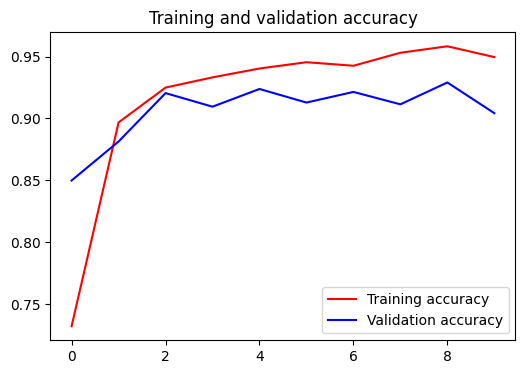

In [47]:
plt.figure(figsize=(6,4))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('train_val_acc.png', dpi = 400)
plt.show()

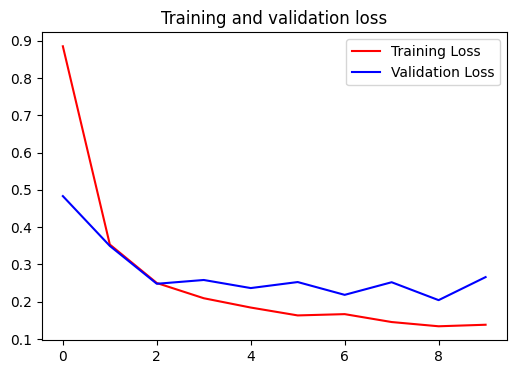

In [48]:
plt.figure(figsize=(6,4))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('train_val_loss.png', dpi = 400)
plt.show()

In [79]:
test_images_scaled = test_images.map(lambda x, y: (data_rescale(x), y))

In [80]:
scores = model.evaluate(test_images_scaled)
print("%s%s: %.2f%%" % ("evaluate_generator ",model.metrics_names[1], scores[1]*100))

85/85 [==============================] - 8s 89ms/step - loss: 0.2387 - accuracy: 0.9162
evaluate_generator accuracy: 91.62%


In [50]:
model.save('cashRec.h5')

In [55]:
import numpy as np
predictions = model.predict(test_images_scaled)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in test_images], axis=0)

85/85 [==============================] - 8s 87ms/step


In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, predicted_labels)

In [86]:
cm

array([[ 66,   0,   1,  20,   7,   0,   0],
       [  0,  81,   0,   0,   0,   0,   0],
       [  0,   1,  97,   0,   1,   2,   0],
       [  6,   0,   5, 352,   5,   2,   2],
       [  2,  11,  14,   5, 266,  10,   7],
       [  0,   0,   7,   1,   0,  96,   0],
       [  0,   1,   0,   3,   0,   0, 278]])

In [87]:
predicted_labels

array([0, 0, 0, ..., 6, 6, 6])

In [88]:
true_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [112]:
test_images.class_names

['fifty', 'five', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']

In [89]:
class_names = test_images.class_names

In [107]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

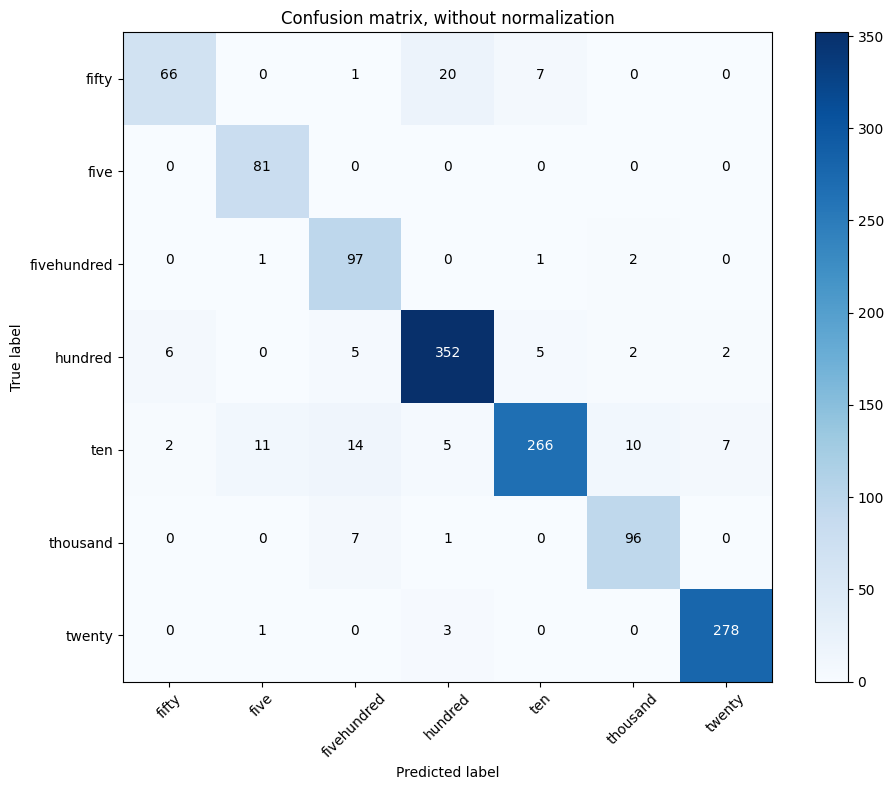

In [108]:
# Plot non-normalized confusion matrix
plt.figure(figsize = (10,8))
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [102]:
precision = precision_score(true_labels, predicted_labels, average ='micro')
recall    = recall_score(true_labels, predicted_labels, average ='micro')
f1        = f1_score(true_labels, predicted_labels, average ='micro')

print(f"Precision = {round(precision * 100, 2)}%")
print(f"Recall = {round(recall * 100, 2)}%")
print(f"F1-score = {round(f1 * 100, 2)}%")

Precision = 91.62%
Recall = 91.62%
F1-score = 91.62%
